In [ ]:
%cd /content/drive/MyDrive/FDM_Lab9

/content/drive/MyDrive/FDM_Lab9


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#from google.colab import files
#uploaded = files.upload()
#df = pd.read_csv(io.BytesIO(uploaded["Titanic.csv"]))
df = pd.read_csv("Titanic.csv")

In [ ]:
#To view the first few rows,
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket Booking Period,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,< 1 week,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,2 weeks,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2 weeks,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3 weeks,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,< 1 week,373450,8.0500,NaN,S


In [ ]:
#To view the last few rows
df.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket Booking Period,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,< 1 week,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,3 weeks,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,4+ weeks,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,< 1 week,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,< 1 week,370376,7.75,NaN,Q


In [ ]:
#Exploring the data types of the columns
df.dtypes

PassengerId                int64
Survived                   int64
Pclass                     int64
Name                      object
Gender                    object
Age                      float64
SibSp                      int64
Parch                      int64
Ticket Booking Period     object
Ticket                    object
Fare                     float64
Cabin                     object
Embarked                  object
dtype: object

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Exploring a particular column
df['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
############Analyzing the dataset#####################################
#Removing  irrelevant columns
df.drop(['Name','SibSp','Ticket'], axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Gender,Age,Parch,Ticket Booking Period,Fare,Cabin,Embarked
0,1,0,3,male,22.0,0,< 1 week,7.2500,NaN,S
1,2,1,1,female,38.0,0,2 weeks,71.2833,C85,C
2,3,1,3,female,26.0,0,2 weeks,7.9250,NaN,S
3,4,1,1,female,35.0,0,3 weeks,53.1000,C123,S
4,5,0,3,male,35.0,0,< 1 week,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,< 1 week,13.0000,NaN,S
887,888,1,1,female,19.0,0,3 weeks,30.0000,B42,S
888,889,0,3,female,NaN,2,4+ weeks,23.4500,NaN,S
889,890,1,1,male,26.0,0,< 1 week,30.0000,C148,C


In [ ]:
#Handling missing data
col_num=0
TotalObjects =df.shape[0]
print ("Column\t\t\t\t\t Null Values%")
for x in df:
  nullCount =df[x].isnull().sum();
  nullPercent = nullCount*100 / (TotalObjects)
  if nullCount > 0 and nullPercent > 30 :
    col_num=col_num+1
    df.drop(x, axis=1,inplace=True)
    print(str(x)+"\t\t\t\t\t "+str(nullPercent))
print ("A total of "+str(col_num)+" deleted !") 

Column					 Null Values%
Cabin					 77.10437710437711
A total of 1 deleted !


In [ ]:
#use the “info()” function to have an idea about null columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PassengerId            891 non-null    int64  
 1   Survived               891 non-null    int64  
 2   Pclass                 891 non-null    int64  
 3   Gender                 891 non-null    object 
 4   Age                    714 non-null    float64
 5   Parch                  891 non-null    int64  
 6   Ticket Booking Period  890 non-null    object 
 7   Fare                   891 non-null    float64
 8   Embarked               889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
#Another method to deal with missing values is, “fillna()”. This can be used to fill the NaN values by
#indicating the missing values in the column. 
df ['Embarked'].fillna('Unknown',inplace = True)

In [ ]:
df['Age'].fillna(0, inplace=True)
df['Ticket Booking Period'].fillna(0, inplace=True)

In [ ]:
#There is another way to fill up missing values, where we can replace the mean value of the relevant column
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [ ]:
#Finally, if you check the null values count in the Df_dataset, now you can see that, now all the columns are
#filled.
df.isnull().sum() 

PassengerId              0
Survived                 0
Pclass                   0
Gender                   0
Age                      0
Parch                    0
Ticket Booking Period    0
Fare                     0
Embarked                 0
dtype: int64

In [ ]:
####################Foramtting data###########################################
#“Ticket Booking Period” column of the data frame contains the information about the ticket reservation
#time period, observe the content of the column.
#Unique function in numpy would be helpful here. Try the code segment below:
pd.unique(df['Ticket Booking Period'].values) 

array(['< 1 week', '2 weeks', '3 weeks', '4+ weeks', 0], dtype=object)

In [ ]:
#Change to numeric
def CalculateTicketBookingPeriod(week):
  if week == '< 1 week':
    return 0.5
  elif week == '4+ weeks':
    return 4
  else:
    wk=str(week)
    return wk.rstrip('weeks')

In [ ]:
#Now we can apply the function to the “Ticket Booking Period” column to convert the weeks to numeric for
#mat.
df['Ticket Booking Period']=df['Ticket Booking Period'].apply(CalculateTicketBookingPeriod)
df['Ticket Booking Period']

0      0.5
1       2 
2       2 
3       3 
4      0.5
      ... 
886    0.5
887     3 
888      4
889    0.5
890    0.5
Name: Ticket Booking Period, Length: 891, dtype: object

In [ ]:
##################Dealing with categorical data###############################
def getNumber(str):
  if str=="male":
    return 1
  else:
    return 2
df["Gender"]= df["Gender"].apply(getNumber)

In [ ]:
df['Gender']

0      1
1      2
2      2
3      2
4      1
      ..
886    1
887    2
888    2
889    1
890    1
Name: Gender, Length: 891, dtype: int64

In [ ]:
def getEmb(str):
  if str=="S":
    return 1
  elif str=='Q':
    return 2
  else:
    return 3
df["Embarked"]=df["Embarked"].apply(getEmb)
df.head()


,PassengerId,Survived,Pclass,Gender,Age,Parch,Ticket Booking Period,Fare,Embarked
0,1,0,3,1,22.0,0,0.5,7.2500,1
1,2,1,1,2,38.0,0,2,71.2833,3
2,3,1,3,2,26.0,0,2,7.9250,1
3,4,1,1,2,35.0,0,3,53.1000,1
4,5,0,3,1,35.0,0,0.5,8.0500,1


In [ ]:
#Saving data to a CSV file
df.to_csv("cleaned_dataset.csv",index=False) 

In [ ]:
####################################Visualization#################################################
import matplotlib.pyplot as plt
from matplotlib import style

577
314


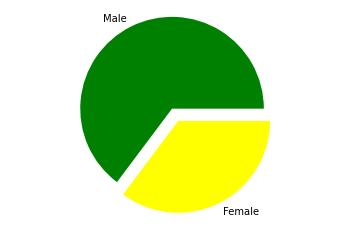

In [ ]:
males = (df['Gender'] == 1).sum()
#Summing up all the values of column gender with a
#condition for male and similary for females
females = (df['Gender'] == 2).sum()
print(males)
print(females)
p = [males, females]
plt.pie(p, #giving array
  labels = ['Male', 'Female'], #Correspndingly giving labels
  colors = ['green', 'yellow'], # Corresponding colors
  explode = (0.15, 0), #How much the gap should me there between the pies
  startangle = 0) #what start angle should be given
plt.axis('equal')
plt.show()

In [ ]:
#For a more detailed visualization
MaleS=df[df.Gender==1][df.Survived==1].shape[0]
print(MaleS)
MaleN=df[df.Gender==1][df.Survived==0].shape[0]
print(MaleN)
FemaleS=df[df.Gender==2][df.Survived==1].shape[0]
print(FemaleS)
FemaleN=df[df.Gender==2][df.Survived==0].shape[0]
print(FemaleN)


109
468
233
81


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


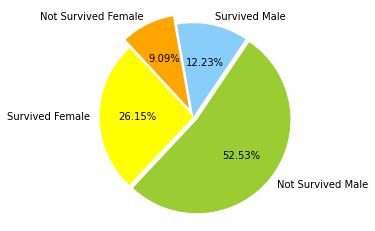

In [ ]:
chart=[MaleS,MaleN,FemaleS,FemaleN]
colors=['lightskyblue','yellowgreen','Yellow','Orange']
labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]
explode=[0,0.05,0,0.1]
plt.pie(chart,labels=labels,colors=colors,explode=explode,startangle=100,counterclock=False,autopct="%.2f%%")
plt.axis("equal")
plt.show()